Demo for creating resource estimates for matrix inversion by QSVT

Cambridge Consultants 2024\
Walden Killick

In [1]:
import numpy as np
import pyqsp
from pyqsp.angle_sequence import Polynomial, QuantumSignalProcessingPhases

from qce24_qre_challenge.circuit import QSVT, BlockEncoding
from qce24_qre_challenge.quantum_oracle import BandedCirculantOracle
from qce24_qre_challenge.sparse_matrix import BandedCirculantMatrix


In [2]:
size = 8

b = np.random.rand(size)
b /= np.linalg.norm(b)

matrix = BandedCirculantMatrix(size=size)

banded_circulant_oracle = BandedCirculantOracle(matrix)

block_encoding = BlockEncoding(banded_circulant_oracle)

In [3]:
pg = pyqsp.poly.PolyOneOverX()
pcoefs = pg.generate(kappa=3, epsilon=0.1)
poly = Polynomial(pcoefs)

phase_angles = QuantumSignalProcessingPhases(
    poly, signal_operator="Wx", method="laurent", measurement="x"
)

b=30, j0=14
[PolyOneOverX] minimum [-3.5325637] is at [-0.20530335]: normalizing
[PolyOneOverX] bounding to 0.5
[pyqsp.PolyOneOverX] pcoefs=[ 0.00000000e+00  4.24568213e+00  0.00000000e+00 -6.14813187e+01
  0.00000000e+00  5.70160728e+02  0.00000000e+00 -3.77110116e+03
  0.00000000e+00  1.86774294e+04  0.00000000e+00 -7.07245446e+04
  0.00000000e+00  2.06037512e+05  0.00000000e+00 -4.61025085e+05
  0.00000000e+00  7.86778785e+05  0.00000000e+00 -1.01130011e+06
  0.00000000e+00  9.59305607e+05  0.00000000e+00 -6.49556764e+05
  0.00000000e+00  2.96436030e+05  0.00000000e+00 -8.15921088e+04
  0.00000000e+00  1.02215704e+04]


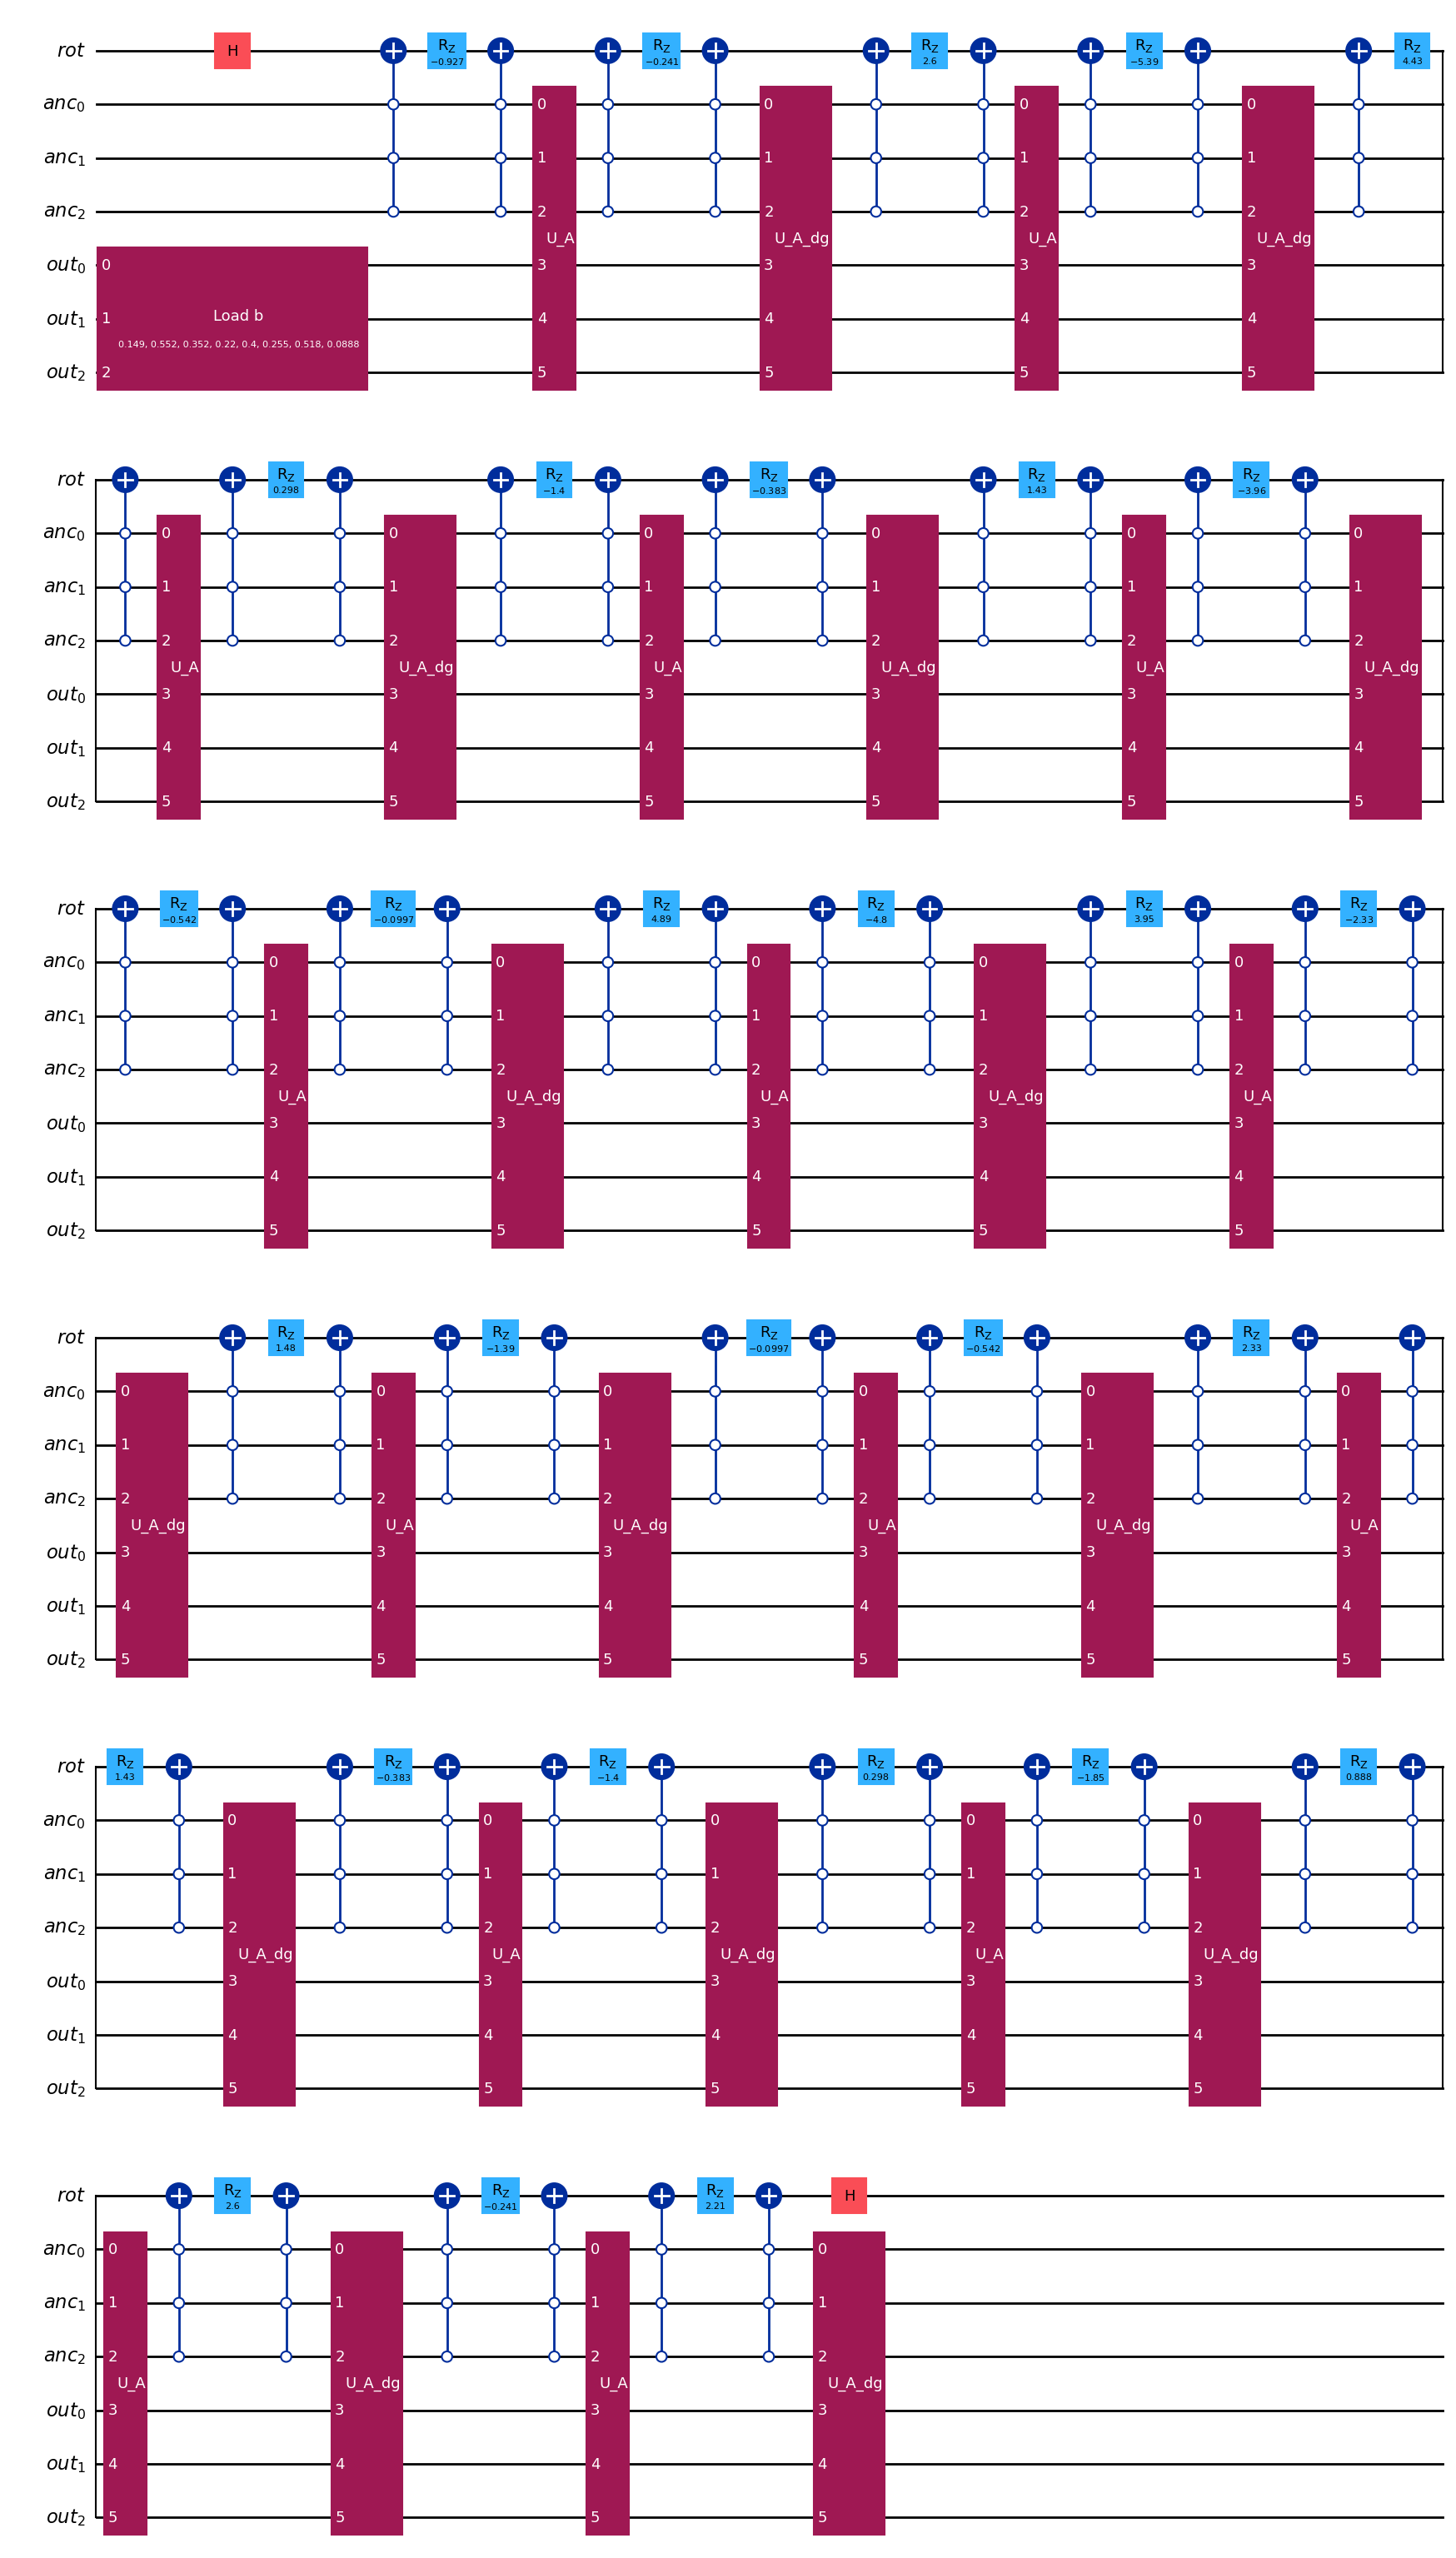

In [4]:
qsvt = QSVT(block_encoding, phase_angles, b)
qsvt_circuit = qsvt.create_circuit()

qsvt_circuit.draw('mpl')